# Proyek Analisis Data: [Air Quality Dataset]
- **Nama:** [Rizky Syah Gumelar]
- **Email:** [m007d4ky2576@bangkit.academy]
- **ID Dicoding:** [rizkysyahgumelar]

## Menentukan Pertanyaan Bisnis

- Pada Stasiun mana yang memiliki kadar senyawa terbanyak?
- Bagaimana tren dari Senyawa Karbon Dioksida (CO) setiap bulannya?
- Apakah terdapat senyawa/fitur yang saling berkorelasi kuat?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Connect Colab dengan GDrive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Data Wrangling

### Gathering Data

In [5]:
# Filepath ke direktori folder data
file_path = '/content/drive/MyDrive/Analisis_Data_dengan_Python/submission/data/'

data1 = pd.read_csv(file_path + 'PRSA_Data_Aotizhongxin_20130301-20170228.csv')
data2 = pd.read_csv(file_path + 'PRSA_Data_Changping_20130301-20170228.csv')
data3 = pd.read_csv(file_path + 'PRSA_Data_Dingling_20130301-20170228.csv')
data4 = pd.read_csv(file_path + 'PRSA_Data_Dongsi_20130301-20170228.csv')
data5 = pd.read_csv(file_path + 'PRSA_Data_Guanyuan_20130301-20170228.csv')
data6 = pd.read_csv(file_path + 'PRSA_Data_Gucheng_20130301-20170228.csv')
data7 = pd.read_csv(file_path + 'PRSA_Data_Huairou_20130301-20170228.csv')
data8 = pd.read_csv(file_path + 'PRSA_Data_Nongzhanguan_20130301-20170228.csv')
data9 = pd.read_csv(file_path + 'PRSA_Data_Shunyi_20130301-20170228.csv')
data10 = pd.read_csv(file_path + 'PRSA_Data_Tiantan_20130301-20170228.csv')
data11 = pd.read_csv(file_path + 'PRSA_Data_Wanliu_20130301-20170228.csv')
data12 = pd.read_csv(file_path + 'PRSA_Data_Wanshouxigong_20130301-20170228.csv')

In [32]:
#Menggabungkan seluruh data menjadi 1
datas = [data1, data2, data3, data4, data5, data6, data7, data8, data9, data10, data11, data12]
main_data = pd.concat(datas).reset_index(drop=True)
main_data

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420763,35060,2017,2,28,19,11.0,32.0,3.0,24.0,400.0,72.0,12.5,1013.5,-16.2,0.0,NW,2.4,Wanshouxigong
420764,35061,2017,2,28,20,13.0,32.0,3.0,41.0,500.0,50.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Wanshouxigong
420765,35062,2017,2,28,21,14.0,28.0,4.0,38.0,500.0,54.0,10.8,1014.2,-13.3,0.0,NW,1.1,Wanshouxigong
420766,35063,2017,2,28,22,12.0,23.0,4.0,30.0,400.0,59.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Wanshouxigong


In [33]:
#menyimpan data menjadi file csv
main_data.to_csv(file_path+'../dashboard/main_data.csv',index=False)

### Assessing Data

In [60]:
df = main_data.copy()
df.drop(columns='No', inplace=True)
print("Info Dataset")
df.info()

Info Dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420768 entries, 0 to 420767
Data columns (total 17 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   year     420768 non-null  int64  
 1   month    420768 non-null  int64  
 2   day      420768 non-null  int64  
 3   hour     420768 non-null  int64  
 4   PM2.5    412029 non-null  float64
 5   PM10     414319 non-null  float64
 6   SO2      411747 non-null  float64
 7   NO2      408652 non-null  float64
 8   CO       400067 non-null  float64
 9   O3       407491 non-null  float64
 10  TEMP     420370 non-null  float64
 11  PRES     420375 non-null  float64
 12  DEWP     420365 non-null  float64
 13  RAIN     420378 non-null  float64
 14  wd       418946 non-null  object 
 15  WSPM     420450 non-null  float64
 16  station  420768 non-null  object 
dtypes: float64(11), int64(4), object(2)
memory usage: 54.6+ MB


In [53]:
#Cek apakah terdapat missing value
print("Cek data kosong")
df.isnull().sum()

Cek data kosong


year           0
month          0
day            0
hour           0
PM2.5       8739
PM10        6449
SO2         9021
NO2        12116
CO         20701
O3         13277
TEMP         398
PRES         393
DEWP         403
RAIN         390
wd          1822
WSPM         318
station        0
dtype: int64

In [54]:
#Cek apakah terdapat data duplikat
print("Cek data duplikat")
df.duplicated().sum()

Cek data duplikat


0

In [71]:
df.describe(include='all')

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
count,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768,420768.000000,420768
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,NaN,12
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NE,NaN,Aotizhongxin
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43653,NaN,35064
mean,2014.662560,6.522930,15.729637,11.500000,79.839718,104.910268,15.913090,50.600220,1235.682649,57.237872,13.531692,1010.753337,2.482421,0.064428,NaN,1.730034,NaN
std,1.177198,3.448707,8.800102,6.922195,80.950217,92.431422,21.896609,35.170876,1161.790893,57.135195,11.437867,10.474302,13.797675,0.820638,NaN,1.246674,NaN
min,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.400000,-43.400000,0.000000,NaN,0.000000,NaN
25%,2014.000000,4.000000,8.000000,5.750000,20.000000,36.000000,3.000000,23.000000,500.000000,10.000000,3.100000,1002.300000,-8.900000,0.000000,NaN,0.900000,NaN
50%,2015.000000,7.000000,16.000000,11.500000,55.000000,82.000000,7.000000,43.000000,900.000000,44.000000,14.500000,1010.400000,3.000000,0.000000,NaN,1.400000,NaN
75%,2016.000000,10.000000,23.000000,17.250000,111.000000,145.000000,20.000000,71.000000,1500.000000,82.000000,23.300000,1019.000000,15.100000,0.000000,NaN,2.200000,NaN


Kolom year:


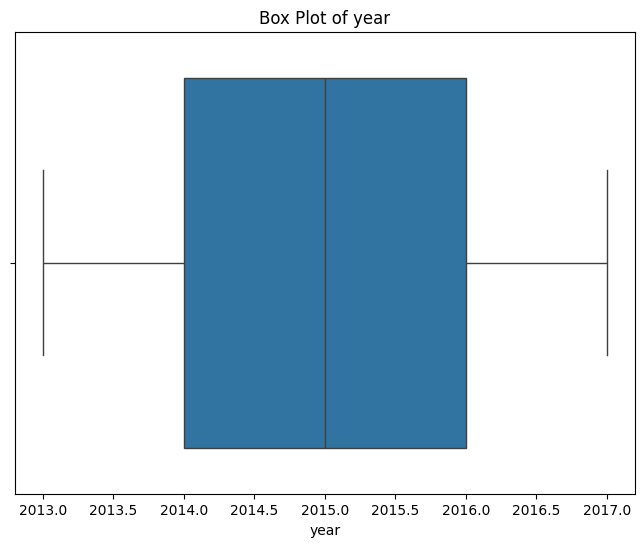


Kolom month:


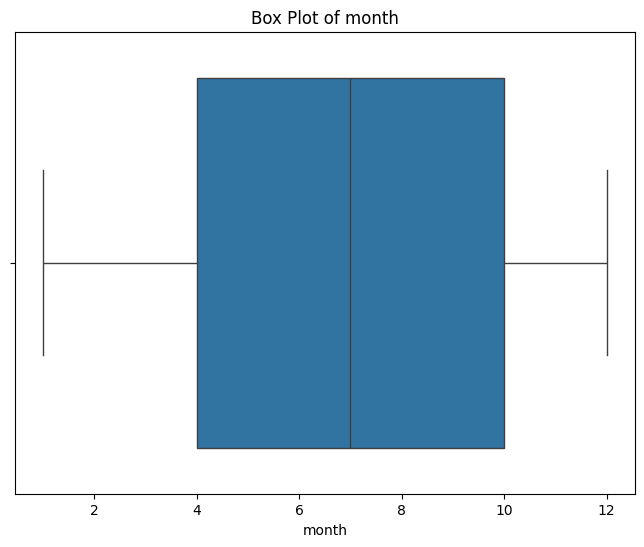


Kolom day:


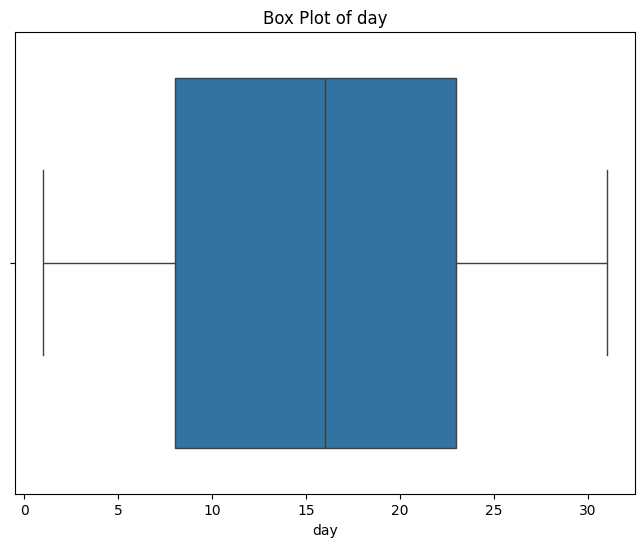


Kolom hour:


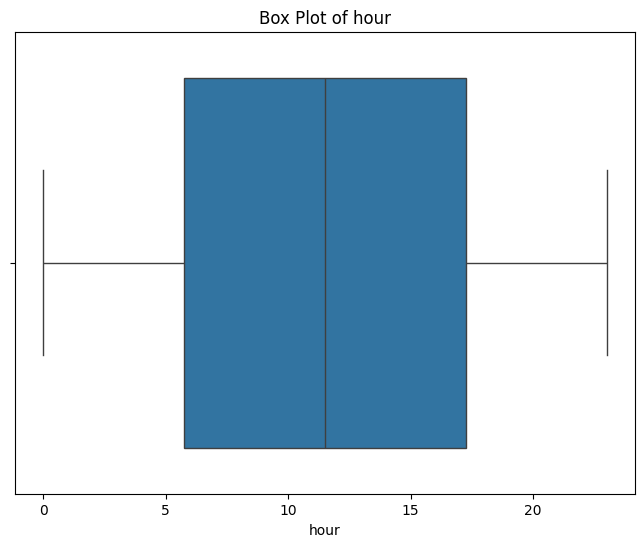


Kolom PM2.5:


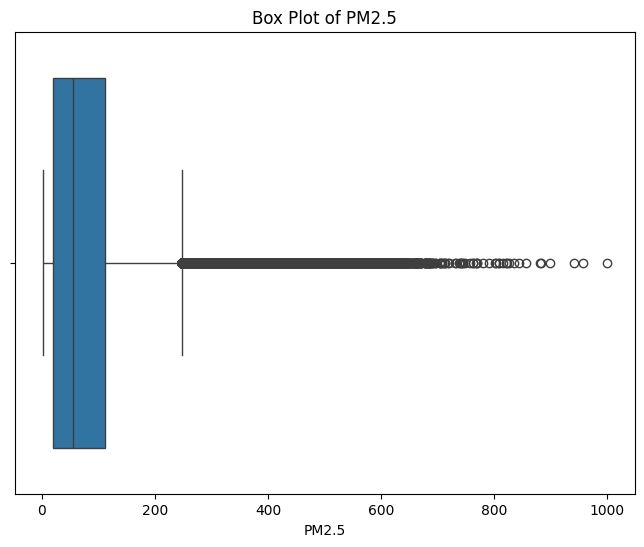


Kolom PM10:


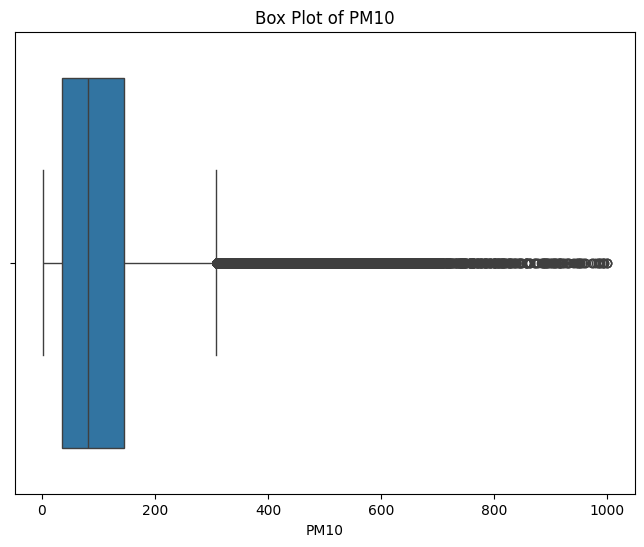


Kolom SO2:


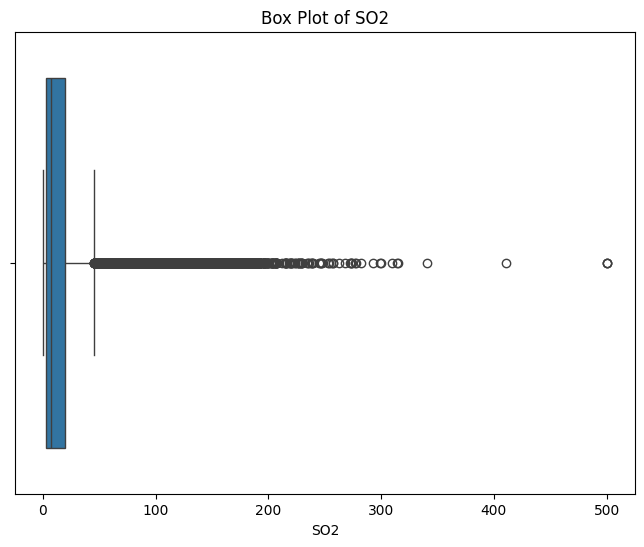


Kolom NO2:


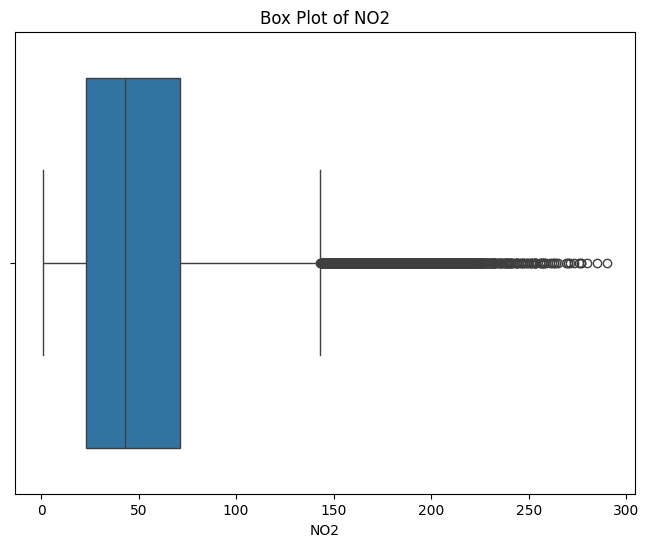


Kolom CO:


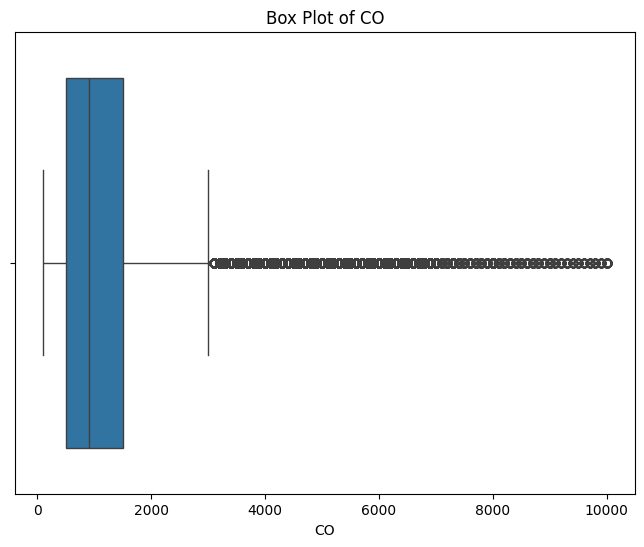


Kolom O3:


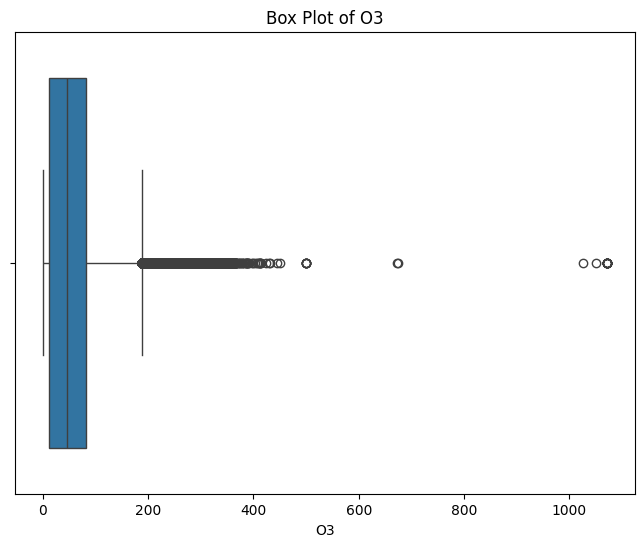


Kolom TEMP:


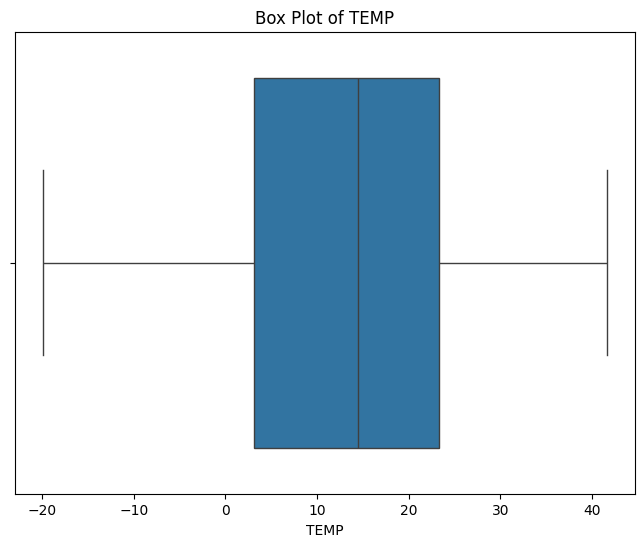


Kolom PRES:


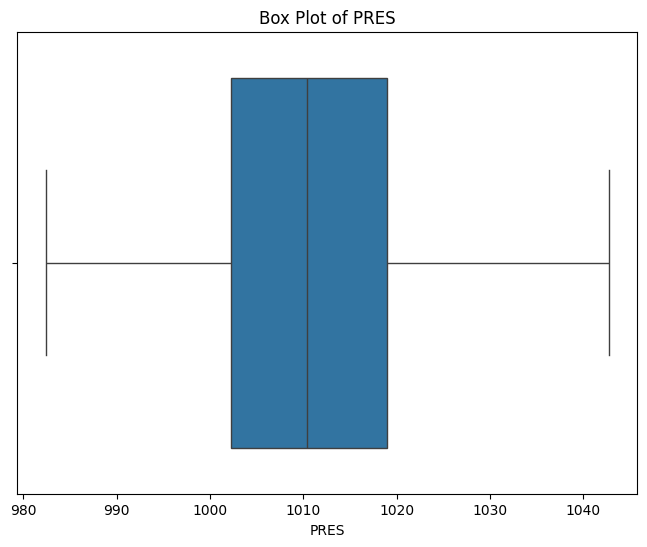


Kolom DEWP:


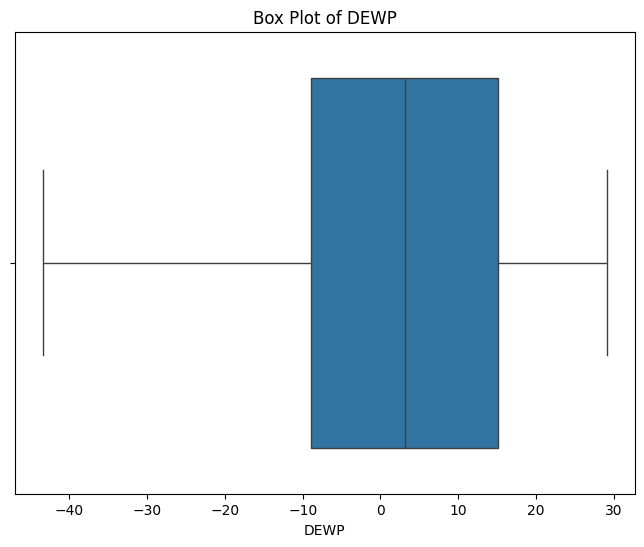


Kolom RAIN:


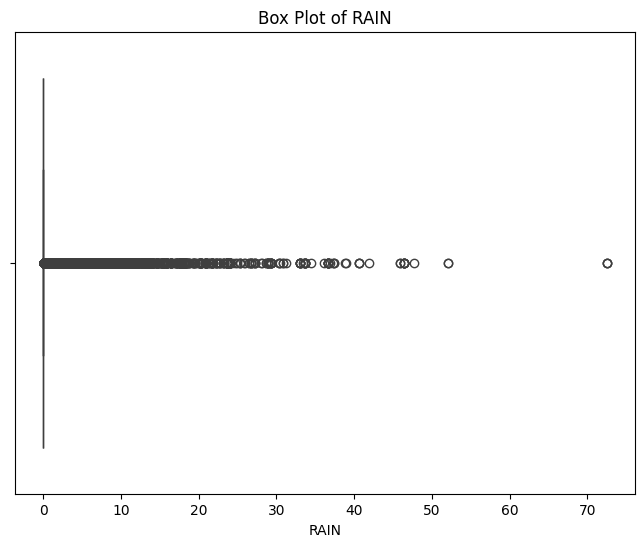


Kolom WSPM:


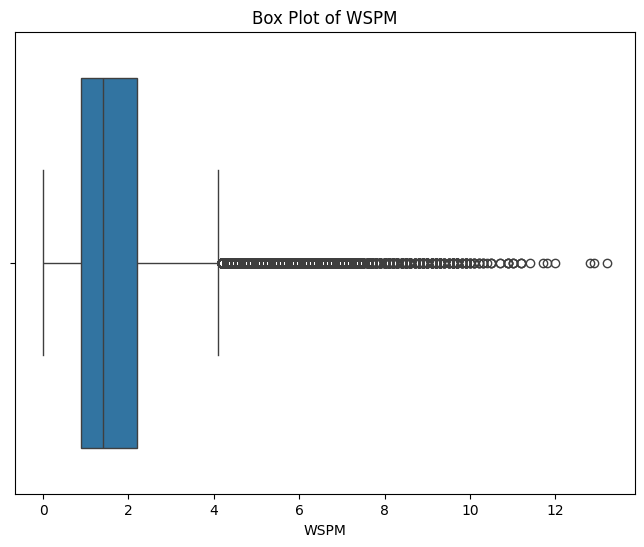

In [56]:
#Cek data outlier menggunakan plotbox

numeric_cols = df.select_dtypes(include=['number']).columns

# Identifikasi outlier untuk setiap kolom numerik
for col in numeric_cols:
    print(f"Kolom {col}:")
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[f'{col}'])

    # Menambahkan label
    plt.xlabel(col)
    plt.title(f'Box Plot of {col}')

    # Menampilkan plot
    plt.show()
    print("")

### Cleaning Data

In [61]:
df.interpolate(method='linear', limit_direction='forward', inplace=True)
df.fillna(method='ffill', inplace=True)

In [62]:
df.info()
print("")
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420768 entries, 0 to 420767
Data columns (total 17 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   year     420768 non-null  int64  
 1   month    420768 non-null  int64  
 2   day      420768 non-null  int64  
 3   hour     420768 non-null  int64  
 4   PM2.5    420768 non-null  float64
 5   PM10     420768 non-null  float64
 6   SO2      420768 non-null  float64
 7   NO2      420768 non-null  float64
 8   CO       420768 non-null  float64
 9   O3       420768 non-null  float64
 10  TEMP     420768 non-null  float64
 11  PRES     420768 non-null  float64
 12  DEWP     420768 non-null  float64
 13  RAIN     420768 non-null  float64
 14  wd       420768 non-null  object 
 15  WSPM     420768 non-null  float64
 16  station  420768 non-null  object 
dtypes: float64(11), int64(4), object(2)
memory usage: 54.6+ MB



year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

## Exploratory Data Analysis (EDA)

### Explorasi Data Keseluruhan

In [72]:
df.describe(include='all')

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
count,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768,420768.000000,420768
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,NaN,12
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NE,NaN,Aotizhongxin
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43653,NaN,35064
mean,2014.662560,6.522930,15.729637,11.500000,79.839718,104.910268,15.913090,50.600220,1235.682649,57.237872,13.531692,1010.753337,2.482421,0.064428,NaN,1.730034,NaN
std,1.177198,3.448707,8.800102,6.922195,80.950217,92.431422,21.896609,35.170876,1161.790893,57.135195,11.437867,10.474302,13.797675,0.820638,NaN,1.246674,NaN
min,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.400000,-43.400000,0.000000,NaN,0.000000,NaN
25%,2014.000000,4.000000,8.000000,5.750000,20.000000,36.000000,3.000000,23.000000,500.000000,10.000000,3.100000,1002.300000,-8.900000,0.000000,NaN,0.900000,NaN
50%,2015.000000,7.000000,16.000000,11.500000,55.000000,82.000000,7.000000,43.000000,900.000000,44.000000,14.500000,1010.400000,3.000000,0.000000,NaN,1.400000,NaN
75%,2016.000000,10.000000,23.000000,17.250000,111.000000,145.000000,20.000000,71.000000,1500.000000,82.000000,23.300000,1019.000000,15.100000,0.000000,NaN,2.200000,NaN


### Korelasi antar Fitur
Korelasi digunakan untuk mengukur seberapa erat hubungan antara dua variabel atau kolom dalam dataset.


<ipython-input-107-9e85fa9ea41b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matriksCorr = df.corr()


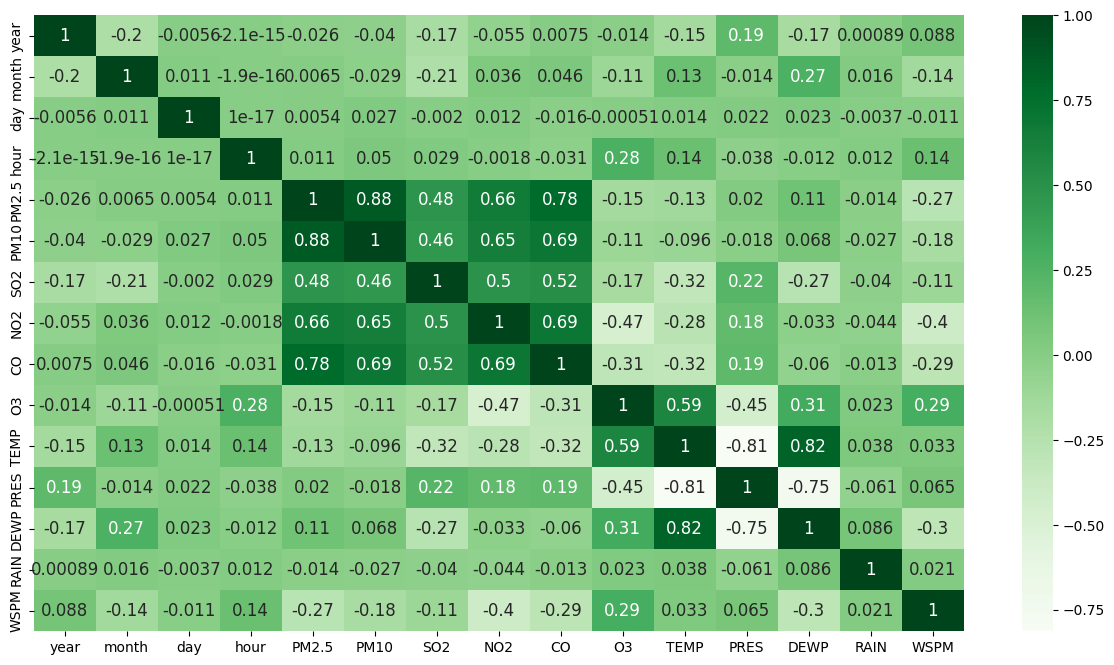

In [107]:
matriksCorr = df.corr()
plt.figure(figsize=(15, 8))
sns.heatmap(matriksCorr, cmap='Greens', annot=True, annot_kws={'fontsize': 12})

plt.show()

Pada hasil korelasi diatas dapat diketahui bahwa nilai korelasi positif antara PM2.5 dengan PM10 sangatlah tinggi yang menandakan hubungan antar fitur yang kuat. Selain itu juga terdapat korelasi positif yang tinggi antara Temperature dengan Dew Point, tetapi berkorelasi negatif dengan Pressure.

### Konsentrasi tahunan senyawa

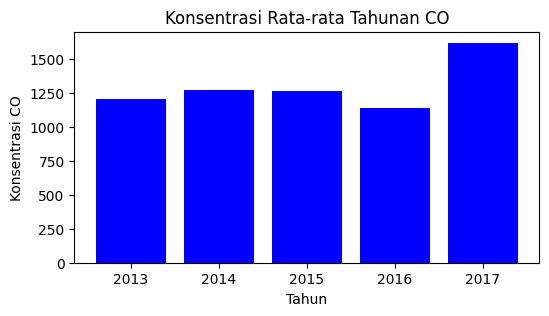

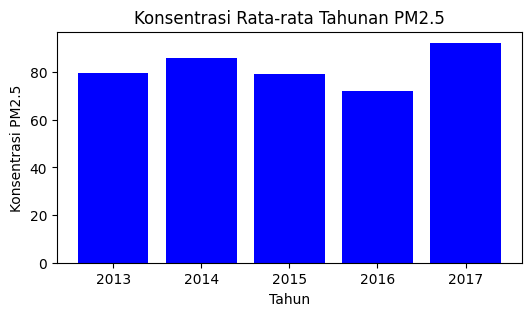

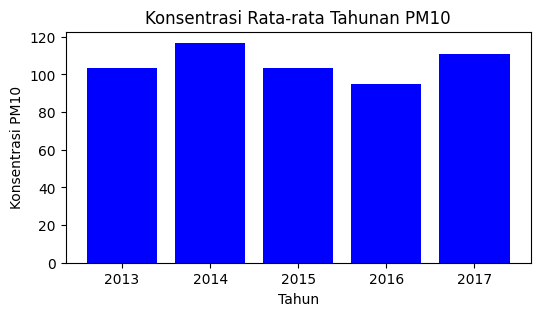

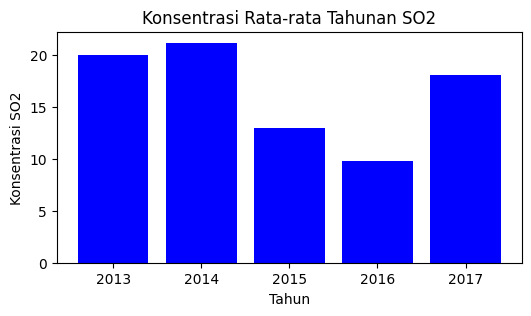

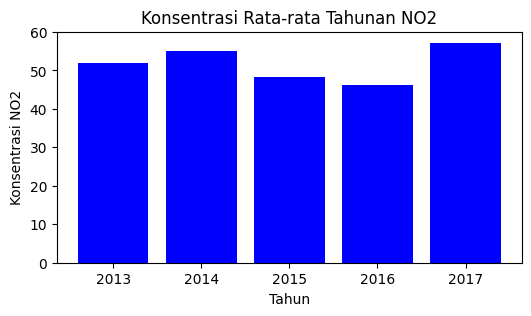

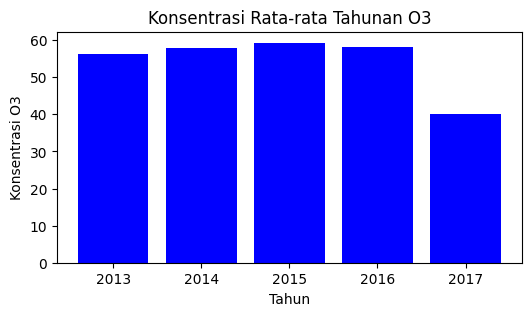

In [145]:
import pandas as pd
import matplotlib.pyplot as plt

# data tahunan
senyawas = ["CO", "PM2.5", "PM10", "SO2", "NO2", "O3"]
for senyawa in senyawas:
  data_time_series_yearly = df[['date', senyawa]].set_index('date').resample('Y').mean()

  # Plot bar chart per tahun
  plt.figure(figsize=(6, 3))
  plt.bar(data_time_series_yearly.index.year, data_time_series_yearly[senyawa], color='blue')
  plt.title(f'Konsentrasi Rata-rata Tahunan {senyawa}')
  plt.xlabel('Tahun')
  plt.ylabel(f'Konsentrasi {senyawa}')
  plt.show()

## Visualization & Explanatory Analysis

### Pertanyaan 1: Pada Stasiun mana yang memiliki kadar senyawa terbanyak?

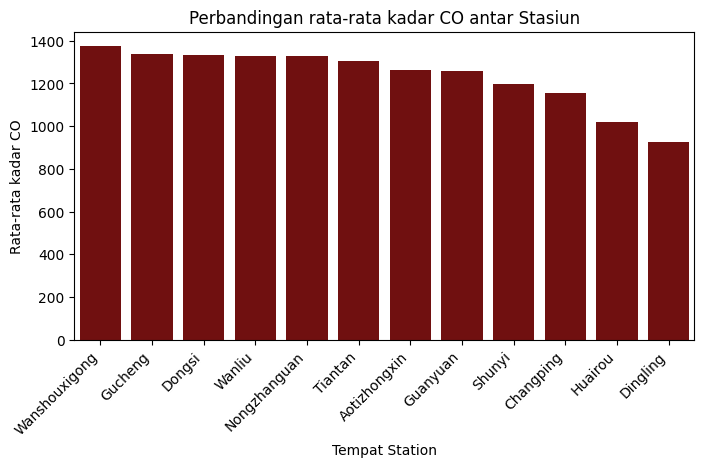

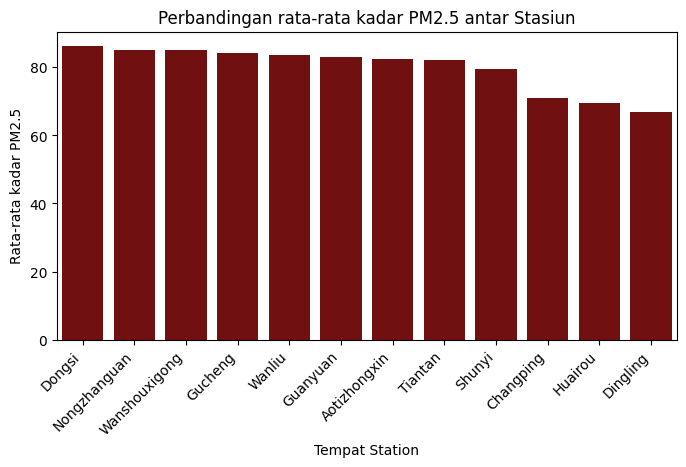

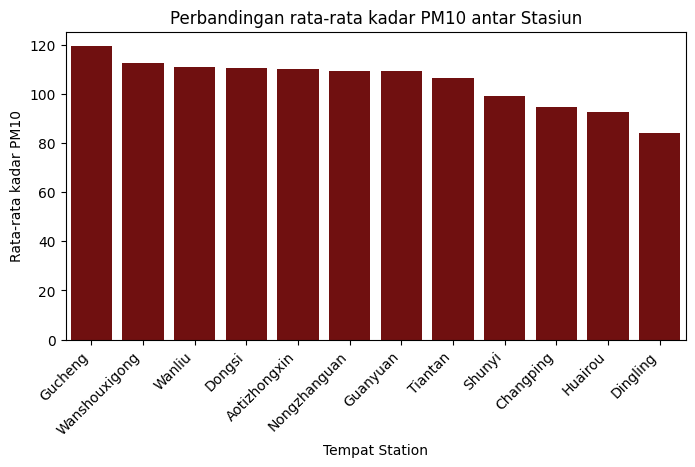

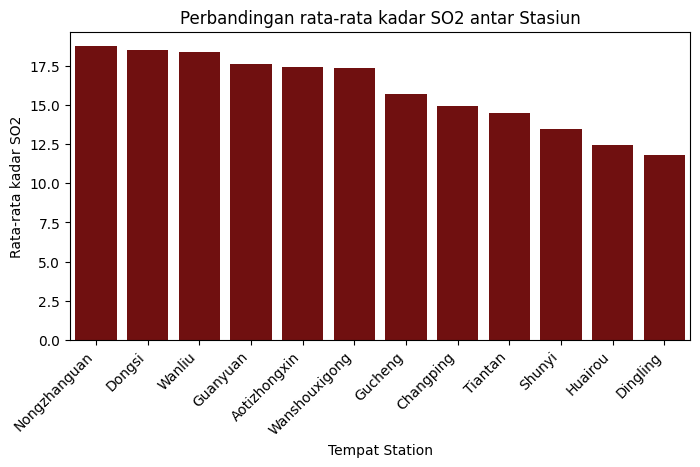

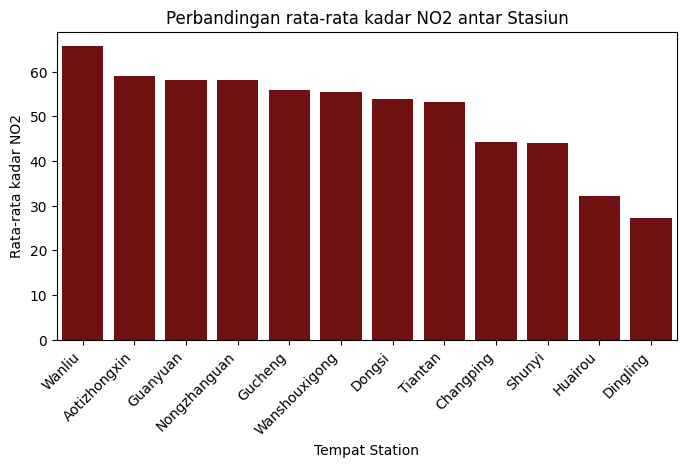

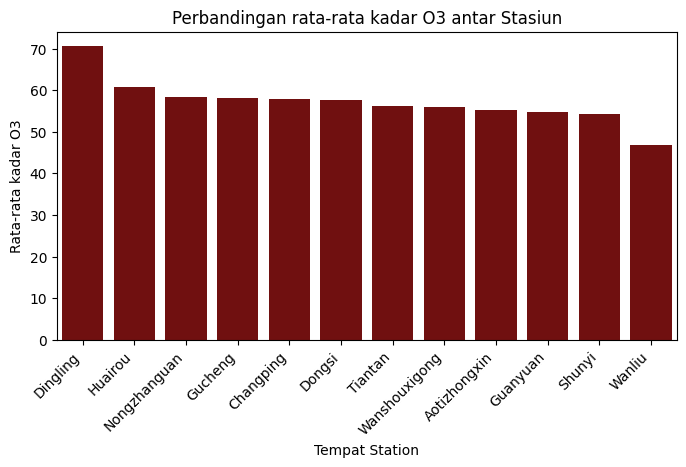

In [106]:
senyawas = ["CO", "PM2.5", "PM10", "SO2", "NO2", "O3"]
for senyawa in senyawas:
  dmean = df.groupby('station')[senyawa].mean().reset_index()
  dmean = dmean.sort_values(by=senyawa, ascending=False)

  # Membuat plot
  plt.figure(figsize=(8, 4))
  sns.barplot(x='station', y=f'{senyawa}', data=dmean, color='maroon')
  plt.xlabel('Tempat Station')
  plt.xticks(rotation=45, ha='right')
  plt.ylabel(f'Rata-rata kadar {senyawa}')
  plt.title(f'Perbandingan rata-rata kadar {senyawa} antar Stasiun')
  plt.show()

### Pertanyaan 2: Bagaimana tren dari Senyawa Karbon Monooksida (CO) setiap bulannya?

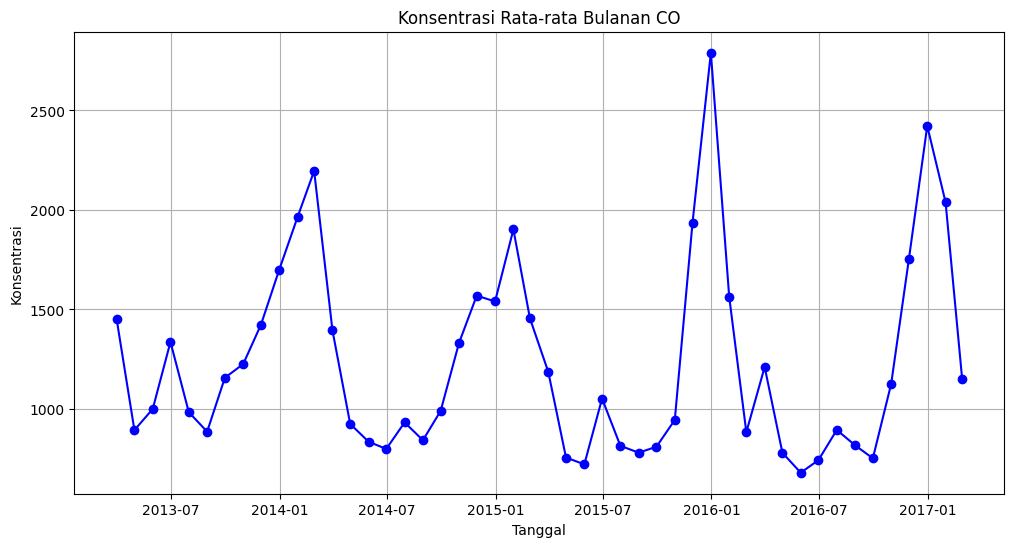

Nilai maksimum CO: 2789.832549283154 (ug/m^3)
Nilai minimum CO: 679.2159498207885 (ug/m^3)


In [139]:
data_time_series_monthly = df[['date', 'CO']].set_index('date').resample('M').mean()
# Plot Bulanan
plt.figure(figsize=(12, 6))
plt.plot(data_time_series_monthly.index, data_time_series_monthly['CO'], marker='o', color='blue', linestyle='-')
plt.title('Konsentrasi Rata-rata Bulanan CO')
plt.xlabel('Tanggal')
plt.ylabel('Konsentrasi')
plt.grid(True)
plt.show()
# Menghitung nilai atas (maksimum) dan nilai bawah (minimum) dari plot
co_max_value = data_time_series_monthly['CO'].max()
co_min_value = data_time_series_monthly['CO'].min()
# Mencetak nilai atas (maksimum) dan nilai bawah (minimum)
print(f"Nilai maksimum CO: {co_max_value} (ug/m^3)")
print(f"Nilai minimum CO: {co_min_value} (ug/m^3)")

### Pertanyaan 3: Apakah terdapat senyawa/fitur yang saling berkorelasi kuat?

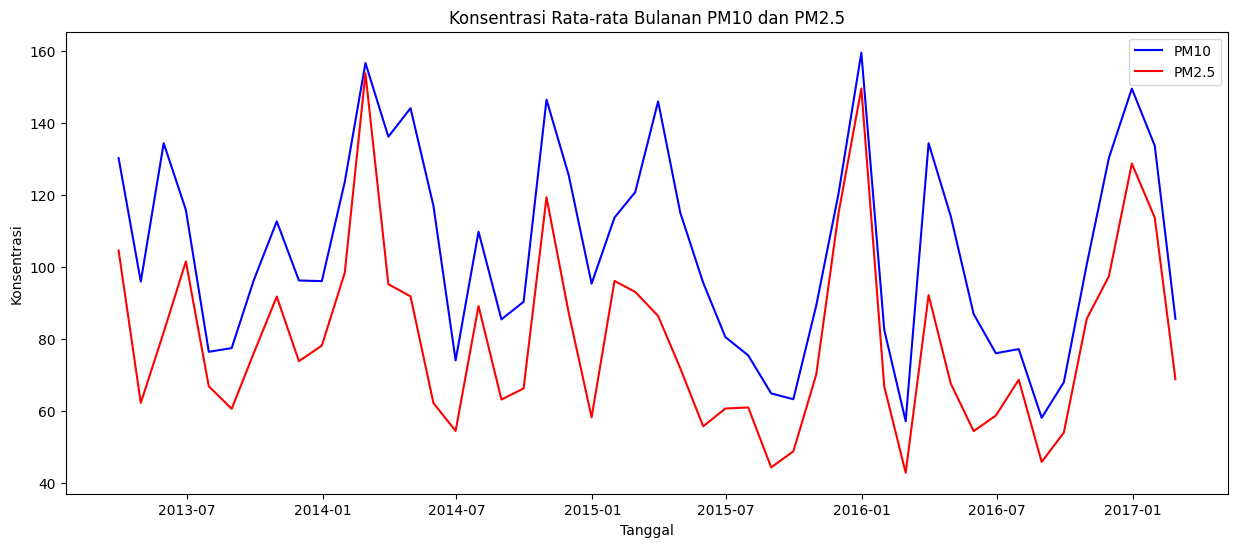

In [131]:
df['date'] = pd.to_datetime(df[['year', 'month', 'day', 'hour']])
data_time_series = df[['date', 'PM10', 'PM2.5']].set_index('date').resample('M').mean()

plt.figure(figsize=(15, 6))
plt.plot(data_time_series.index, data_time_series['PM10'], label='PM10', color='blue')
plt.plot(data_time_series.index, data_time_series['PM2.5'], label='PM2.5', color='red')
plt.title('Konsentrasi Rata-rata Bulanan PM10 dan PM2.5')
plt.xlabel('Tanggal')
plt.ylabel('Konsentrasi')
plt.legend()
plt.show()

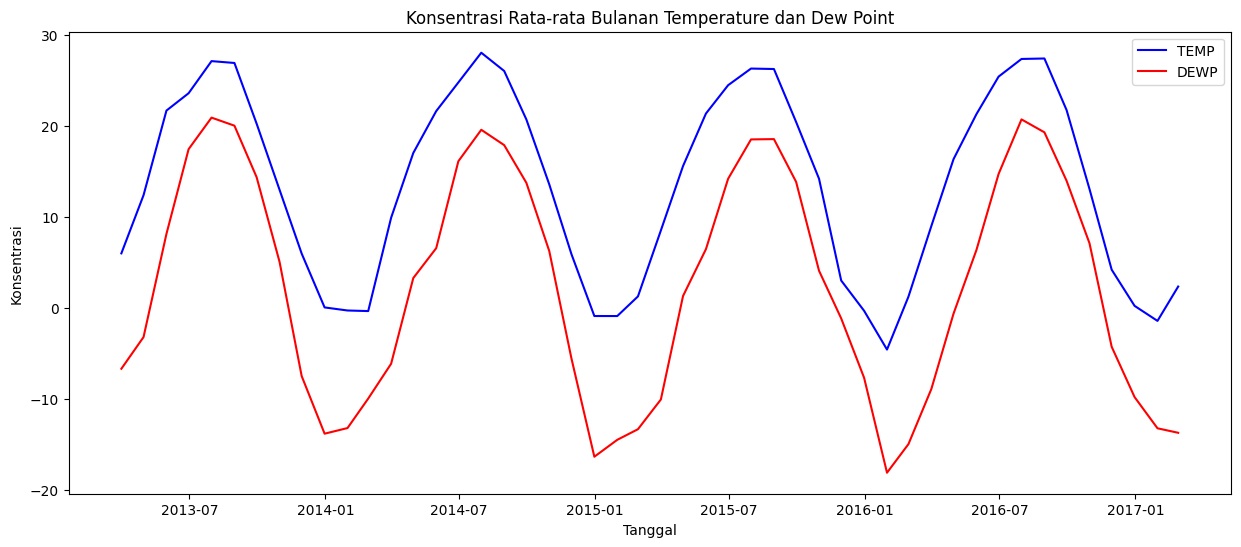

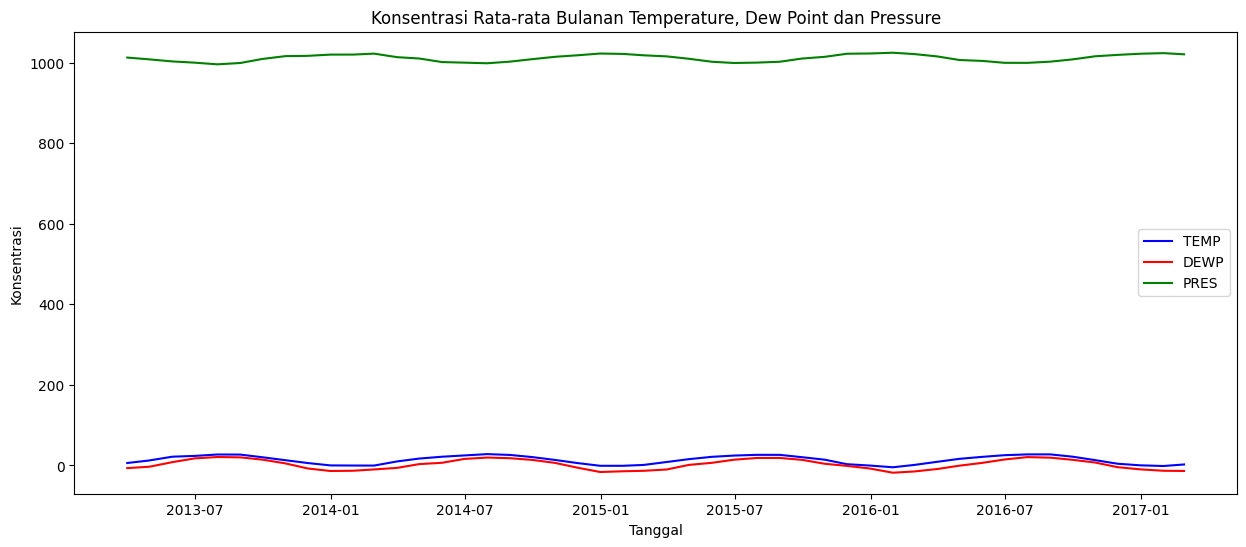

In [137]:
df['date'] = pd.to_datetime(df[['year', 'month', 'day', 'hour']])
data_time_series = df[['date', 'TEMP', 'DEWP']].set_index('date').resample('M').mean()

plt.figure(figsize=(15, 6))
plt.plot(data_time_series.index, data_time_series['TEMP'], label='TEMP', color='blue')
plt.plot(data_time_series.index, data_time_series['DEWP'], label='DEWP', color='red')
plt.title('Konsentrasi Rata-rata Bulanan Temperature dan Dew Point')
plt.xlabel('Tanggal')
plt.ylabel('Konsentrasi')
plt.legend()
plt.show()

df['date'] = pd.to_datetime(df[['year', 'month', 'day', 'hour']])
data_time_series = df[['date', 'TEMP', 'DEWP', 'PRES']].set_index('date').resample('M').mean()

plt.figure(figsize=(15, 6))
plt.plot(data_time_series.index, data_time_series['TEMP'], label='TEMP', color='blue')
plt.plot(data_time_series.index, data_time_series['DEWP'], label='DEWP', color='red')
plt.plot(data_time_series.index, data_time_series['PRES'], label='PRES', color='green')
plt.title('Konsentrasi Rata-rata Bulanan Temperature, Dew Point dan Pressure')
plt.xlabel('Tanggal')
plt.ylabel('Konsentrasi')
plt.legend()
plt.show()

## Conclusion

#Conclution pertanyaan 1
**Pada Stasiun mana yang memiliki kadar senyawa terbanyak?**

**Jawab :** Dari visualisasi yang telah dibuat dapat diketahui bahwa intensitas senyawa terbanyak pada masing-masing stasiun berbeda. berikut adalah kesimpulan dari grafik tersebut:

- Station dengan kadar kandungan CO tertinggi adalah Wanshouxigong.
- Station dengan kadar kandungan PM2.5 tertinggi adalah Dongsi.
- Station dengan kadar kandungan PM10 tertinggi adalah Gucheng.
- Station dengan kadar kandungan SO2 tertinggi adalah Nongzhanguan.
- Station dengan kadar kandungan NO2 tertinggi adalah Wanliu.
- Station dengan kadar kandungan O3 tertinggi adalah Dingling.



#Conclution pertanyaan 2
**Bagaimana tren dari Senyawa Karbon Monooksida (CO) setiap bulannya?**

**Jawab :** Dari visualisasi yang telah dibuat dapat diketahui bahwa tren kadar senyawa Karbon Monooksida (CO) cukup fluktuatif yaitu dengan rata-rata maks 2789 ug/m^3 pada Januari 2016 dan 679 ug/m^3 pada Juli 2016. dari visualisasi datas juga dapat diketahui bahwa kadar CO selalu meningkat dan berada dipuncaknya tiap bulan januari.


#Conclution pertanyaan 3
**Apakah terdapat senyawa/fitur yang saling berkorelasi kuat?**

**Jawab :** Iya. Pada hasil Matriks korelasi dan visualisasi diatas dapat diketahui bahwa nilai korelasi positif antara PM2.5 dengan PM10 sangatlah tinggi yang menandakan hubungan antar fitur yang kuat.
Selain itu juga terdapat korelasi positif yang tinggi antara Temperature (TEMP)dengan Dew Point (DEWP), tetapi berkorelasi negatif dengan Pressure (PRES).

Dari visualisasi diatas juga dapat diketahui bahwa tren Temperature, Dew Point dan Pressure membentuk sebuah pola yang sangat jelas, yaitu Temperature dan Dew Point yang turun dibulan januari dan naik pada bulan Juli, tetapi berlaku sebaliknya pada Presure karena berkorelasi negatif.